Тестовое задание (Python)

In [1]:
import pandas as pd
import numpy as np

import json


data = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

arr=np.array(data)
event_json=[] #массив данных столбца event_json 
for i in range(len(arr)):
    event_json.append(arr[i,7])
d=[]

for i in range (len(arr)):
    #преобразуем массив event_json в словарь
    d.append(json.loads(event_json[i]))


In [2]:
data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


1.a.

In [6]:
sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
sum6=0
for i in range (len(event_json)):
    if d[i]["ad_type"]=="int":
        
        sum1+=(d[i]["revenue"])*1000
        sum2+=1
    if d[i]["ad_type"]=="banner":
        sum3+=(d[i]["revenue"])*1000
        sum4+=1
    if d[i]["ad_type"]=="rv":
        sum5+=(d[i]["revenue"])*1000
        sum6+=1
print ("Среднее eCPM для формата int",sum1/sum2, "$")
print ("Среднее eCPM для формата banner ",sum3/sum4, "$")
print ("Среднее eCPM для формата rv",sum5/sum6, "$")

Среднее eCPM для формата int 2.f 36.20963410063508 $
Среднее eCPM для формата banner  0.7441126796566925 $
Среднее eCPM для формата banner 65.05116509108255 $


1.b.

In [8]:
arr3=[]
arr4=[]
arr5=[]
arr6=[]
arr7=[]
arr8=[]
for i in range (len(d)):
    if d[i]["ad_type"]=="banner":
        arr3.append(d[i]["revenue"]*1000)
        arr4.append(arr2[i])
    if d[i]["ad_type"]=="int":
        arr5.append(d[i]["revenue"]*1000)
        arr6.append(arr2[i])
    if d[i]["ad_type"]=="rv":
        arr7.append(d[i]["revenue"]*1000)
        arr8.append(arr2[i])



df2={"city":arr4, "eCPM (USD)":arr3}
data2=pd.DataFrame(df2)
#удаляем строки не содержащие информацию о городе юзера
data2=data2.dropna()
df3={"city":arr6, "eCPM (USD)":arr5}
data3=pd.DataFrame(df3)
#удаляем строки не содержащие информацию о городе юзера
data3=data3.dropna()
df4={"city":arr8, "eCPM (USD)":arr7}
data4=pd.DataFrame(df4)
#удаляем строки не содержащие информацию о городе юзера
data4=data4.dropna()


               city  eCPM (USD)
0           Norwalk    0.510313
1           Norwalk    0.510313
2         Charlotte    2.386163
19         Columbus    1.999664
20         Columbus    0.530292
...             ...         ...
815979       Elmira    0.019972
815980  Cherry Hill    6.740355
815981  Cherry Hill    2.780058
815982  Cherry Hill    2.780058
815983  Cherry Hill    2.780058

[508191 rows x 2 columns]
            city  eCPM (USD)
0          Cocoa   13.893784
2      Jamestown    9.870711
3      Jamestown    7.417912
4      Jamestown   11.965651
5      Jamestown   11.965651
...          ...         ...
37608     Elmira   23.160000
37609     Elmira   15.681322
37610     Elmira   18.045628
37611     Elmira   23.190308
37612     Elmira   20.849997

[23818 rows x 2 columns]
              city  eCPM (USD)
0            Tampa       80.64
1            Tampa       80.64
2            Tampa       80.64
3            Tampa       28.24
4            Tampa       28.24
...            ...         ..

In [76]:
data2

,eCPM (USD)
city,
Aberdeen,0.321518
Abilene,0.941283
Addison,0.142235
Afton,0.303306
Akron,0.389318
...,...
Youngstown,1.486004
Ypsilanti,0.270616
Yukon,0.146717


In [11]:
data3

,city,eCPM (USD)
0,Cocoa,13.893784
2,Jamestown,9.870711
3,Jamestown,7.417912
4,Jamestown,11.965651
5,Jamestown,11.965651
...,...,...
37608,Elmira,23.160000
37609,Elmira,15.681322
37610,Elmira,18.045628
37611,Elmira,23.190308


In [12]:
data4

,city,eCPM (USD)
0,Tampa,80.64
1,Tampa,80.64
2,Tampa,80.64
3,Tampa,28.24
4,Tampa,28.24
...,...,...
6477,Indianapolis,28.24
6478,Indianapolis,28.24
6479,Indianapolis,28.24
6480,Indianapolis,28.24


In [9]:
#создадим массив данных содержащий информацию о версиях ОС
os_version=[]
for i in range (len(arr)):
    os_version.append(arr[i,1])
    

In [87]:
arr9=[]
arr10=[]
arr11=[]
arr12=[]
arr13=[]
arr14=[]
for i in range (len(d)):
    if d[i]["ad_type"]=="banner":
        arr9.append(d[i]["revenue"]*1000)
        arr10.append(os_version[i])
    if d[i]["ad_type"]=="int":
        arr11.append(d[i]["revenue"]*1000)
        arr12.append(os_version[i])
    if d[i]["ad_type"]=="rv":
        arr13.append(d[i]["revenue"]*1000)
        arr14.append(os_version[i])


df5={"os_version":arr10, "eCPM (USD)":arr9}
data5=pd.DataFrame(df5)
data5=data5.dropna()
df6={"os_version":arr12, "eCPM (USD)":arr11}
data6=pd.DataFrame(df6)
data6=data6.dropna()
df7={"os_version":arr14, "eCPM (USD)":arr13}
data7=pd.DataFrame(df7)
data7=data7.dropna()


In [15]:
data5

,os_verion,eCPM (USD)
0,11,0.510313
1,11,0.510313
2,11,2.386163
3,10,6.827570
4,10,0.494196
...,...,...
815979,12,0.019972
815980,12,6.740355
815981,12,2.780058
815982,12,2.780058


In [16]:
data6

,os_version,eCPM (USD)
0,10,13.893784
1,10,11.280232
2,11,9.870711
3,11,7.417912
4,11,11.965651
...,...,...
37608,12,23.160000
37609,12,15.681322
37610,12,18.045628
37611,12,23.190308


In [17]:
data7

,os_version,eCPM (USD)
0,11,80.64
1,11,80.64
2,11,80.64
3,11,28.24
4,11,28.24
...,...,...
6477,12,28.24
6478,12,28.24
6479,12,28.24
6480,12,28.24


1.с.

In [19]:
arr15=[]
arr16=[]
arr17=[]
arr18=[]
arr19=[]
arr20=[]
for i in range (len(d)):
    if d[i]["ad_type"]=="banner":
        arr15.append(d[i]["revenue"])
        arr16.append(arr2[i])
    if d[i]["ad_type"]=="int":
        arr17.append(d[i]["revenue"])
        arr18.append(arr2[i])
    if d[i]["ad_type"]=="rv":
        arr19.append(d[i]["revenue"])
        arr20.append(arr2[i])


df8={"city":arr16, "revenue (USD)":arr15}
data8=pd.DataFrame(df8)
data8=data8.dropna()
df9={"city":arr18, "revenue (USD)":arr17}
data9=pd.DataFrame(df9)
data9=data9.dropna()
df10={"city":arr20, "revenue (USD)":arr19}
data10=pd.DataFrame(df10)
data10=data10.dropna()


In [20]:
data8

,city,revenue (USD)
0,Norwalk,0.000510
1,Norwalk,0.000510
2,Charlotte,0.002386
19,Columbus,0.002000
20,Columbus,0.000530
...,...,...
815979,Elmira,0.000020
815980,Cherry Hill,0.006740
815981,Cherry Hill,0.002780
815982,Cherry Hill,0.002780


In [21]:
data9

,city,revenue (USD)
0,Cocoa,0.013894
2,Jamestown,0.009871
3,Jamestown,0.007418
4,Jamestown,0.011966
5,Jamestown,0.011966
...,...,...
37608,Elmira,0.023160
37609,Elmira,0.015681
37610,Elmira,0.018046
37611,Elmira,0.023190


In [59]:
data10

,revenue (USD)
city,
Aberdeen,0.021516
Abilene,0.106986
Akron,1.656296
Alameda,0.080640
Albany,0.162581
...,...
York,0.028240
Youngstown,0.081440
Ypsilanti,0.080640


In [23]:
arr21=[]
arr22=[]
arr23=[]
arr24=[]
arr25=[]
arr26=[]
for i in range (len(d)):
    if d[i]["ad_type"]=="banner":
        arr21.append(d[i]["revenue"])
        arr22.append(os_version[i])
    if d[i]["ad_type"]=="int":
        arr23.append(d[i]["revenue"])
        arr24.append(os_version[i])
    if d[i]["ad_type"]=="rv":
        arr25.append(d[i]["revenue"])
        arr26.append(os_version[i])



df11={"os_version":arr22, "revenue (USD)":arr21}
data11=pd.DataFrame(df11)
data11=data11.dropna()
df12={"os_version":arr24, "revenue (USD)":arr23}
data12=pd.DataFrame(df12)
data12=data12.dropna()
df13={"os_version":arr26, "revenue (USD)":arr25}
data13=pd.DataFrame(df13)
data13=data13.dropna()


In [24]:
data11

,os_version,revenue (USD)
0,11,0.000510
1,11,0.000510
2,11,0.002386
3,10,0.006828
4,10,0.000494
...,...,...
815979,12,0.000020
815980,12,0.006740
815981,12,0.002780
815982,12,0.002780


In [25]:
data12

,os_version,revenue (USD)
0,10,0.013894
1,10,0.011280
2,11,0.009871
3,11,0.007418
4,11,0.011966
...,...,...
37608,12,0.023160
37609,12,0.015681
37610,12,0.018046
37611,12,0.023190


In [52]:
data13

            revenue (USD)
os_version               
10              51.470091
11             107.291533
12             237.592767
5.0.2            0.028377
6.0.1            0.036764
7.0              2.071224
7.1.1            0.121076
8.0.0            2.316879
8.1.0            0.923077
9               19.809863
            revenue (USD)
os_version               
10               0.053337
11               0.053379
12               0.079569
5.0.2            0.014189
6.0.1            0.009191
7.0              0.079662
7.1.1            0.024215
8.0.0            0.038615
8.1.0            0.031830
9                0.050152


2.

Данные по рекламному формату banner

<AxesSubplot:title={'center':'eCPM (USD)'}, xlabel='[os_version]'>

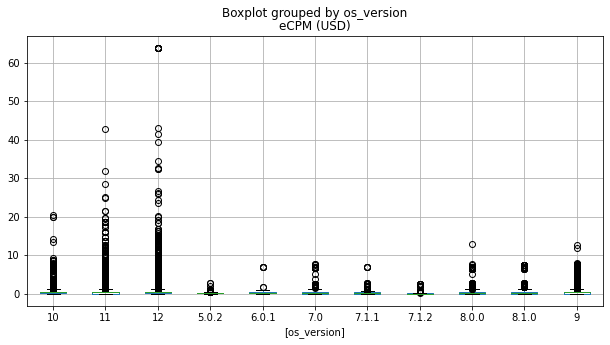

In [88]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
data5.boxplot(by="os_version")

array([[<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'5.0.2'}>,
        <AxesSubplot:title={'center':'6.0.1'}>,
        <AxesSubplot:title={'center':'7.0'}>],
       [<AxesSubplot:title={'center':'7.1.1'}>,
        <AxesSubplot:title={'center':'7.1.2'}>,
        <AxesSubplot:title={'center':'8.0.0'}>],
       [<AxesSubplot:title={'center':'8.1.0'}>,
        <AxesSubplot:title={'center':'9'}>, <AxesSubplot:>]], dtype=object)

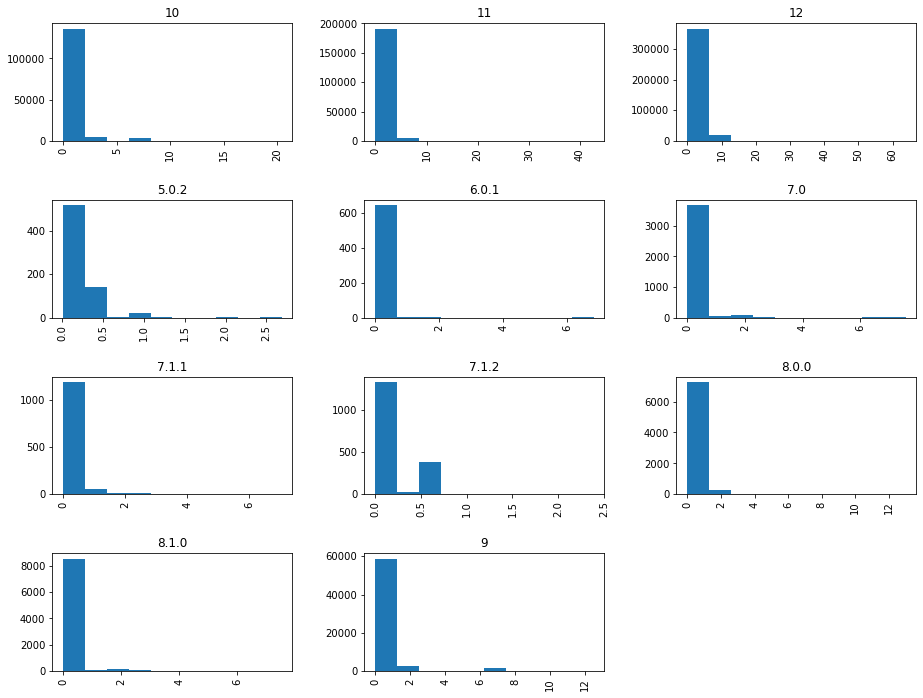

In [93]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
data5.hist(by="os_version")

In [94]:
data2.groupby("city").sum()

,eCPM (USD)
city,
Aberdeen,30.865747
Abilene,43.298997
Addison,0.142235
Afton,110.403560
Akron,131.978667
...,...
Youngstown,432.427227
Ypsilanti,423.514021
Yukon,164.029090


In [105]:
data2.describe()

,eCPM (USD)
count,508191.000000
mean,0.732993
std,1.370788
min,0.000080
25%,0.041686
50%,0.494196
75%,0.531158
max,43.021387


Данные по рекламному формату int

<AxesSubplot:title={'center':'eCPM (USD)'}, xlabel='[os_version]'>

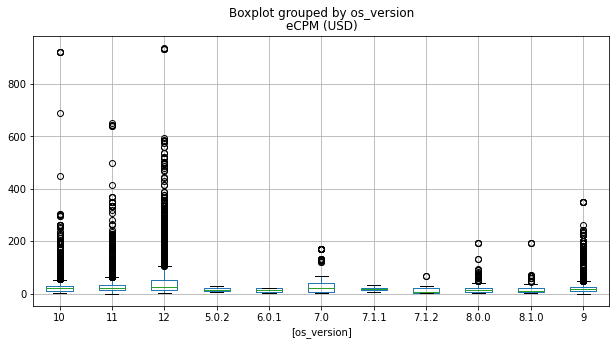

In [91]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
data6.boxplot(by="os_version")


array([[<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'5.0.2'}>,
        <AxesSubplot:title={'center':'6.0.1'}>,
        <AxesSubplot:title={'center':'7.0'}>],
       [<AxesSubplot:title={'center':'7.1.1'}>,
        <AxesSubplot:title={'center':'7.1.2'}>,
        <AxesSubplot:title={'center':'8.0.0'}>],
       [<AxesSubplot:title={'center':'8.1.0'}>,
        <AxesSubplot:title={'center':'9'}>, <AxesSubplot:>]], dtype=object)

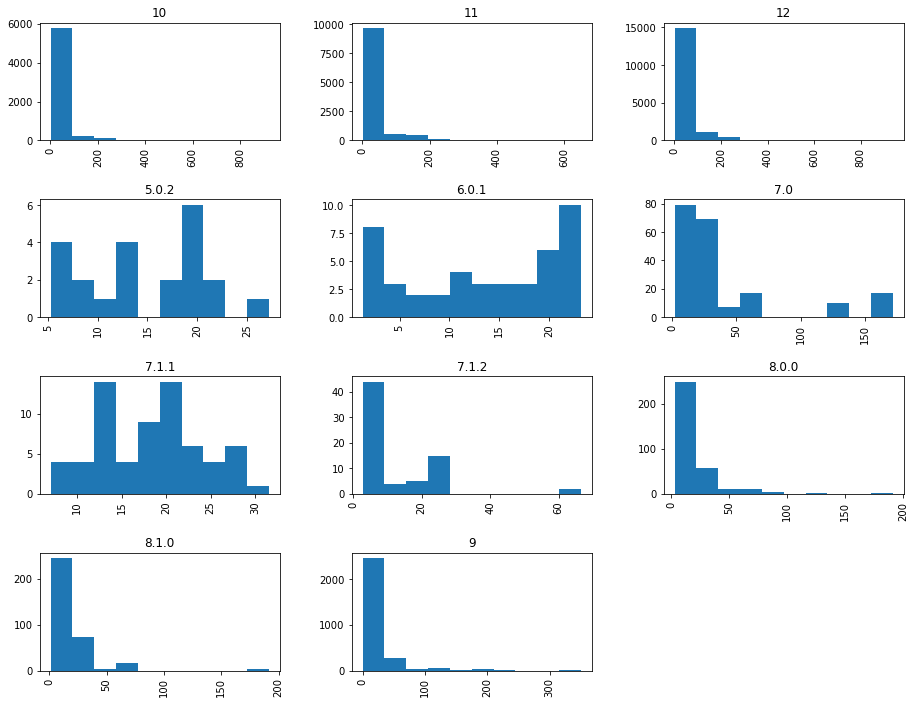

In [92]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
data6.hist(by="os_version")


In [96]:
data3.groupby("city").sum()

,eCPM (USD)
city,
Aberdeen,81.499710
Abilene,402.410258
Afton,727.218931
Akron,1680.294680
Alameda,20.145481
...,...
Youngstown,626.510839
Ypsilanti,2771.166065
Yukon,637.687708


In [104]:
data3.describe()

,eCPM (USD)
count,23818.000000
mean,36.212945
std,47.639158
min,0.000000
25%,11.965651
50%,21.398855
75%,37.921982
max,937.195984


Данные по рекламному формату rv

<AxesSubplot:title={'center':'eCPM (USD)'}, xlabel='[os_version]'>

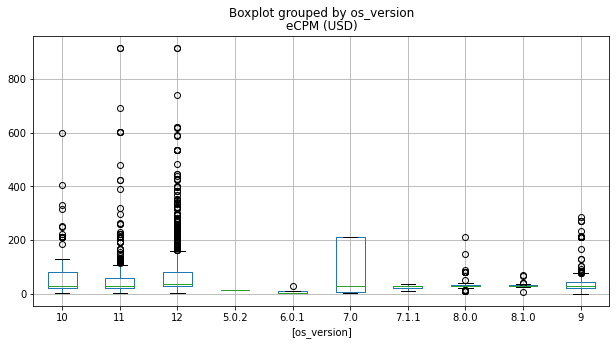

In [84]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

data7.boxplot(by="os_version")


array([[<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'5.0.2'}>,
        <AxesSubplot:title={'center':'6.0.1'}>,
        <AxesSubplot:title={'center':'7.0'}>],
       [<AxesSubplot:title={'center':'7.1.1'}>,
        <AxesSubplot:title={'center':'8.0.0'}>,
        <AxesSubplot:title={'center':'8.1.0'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

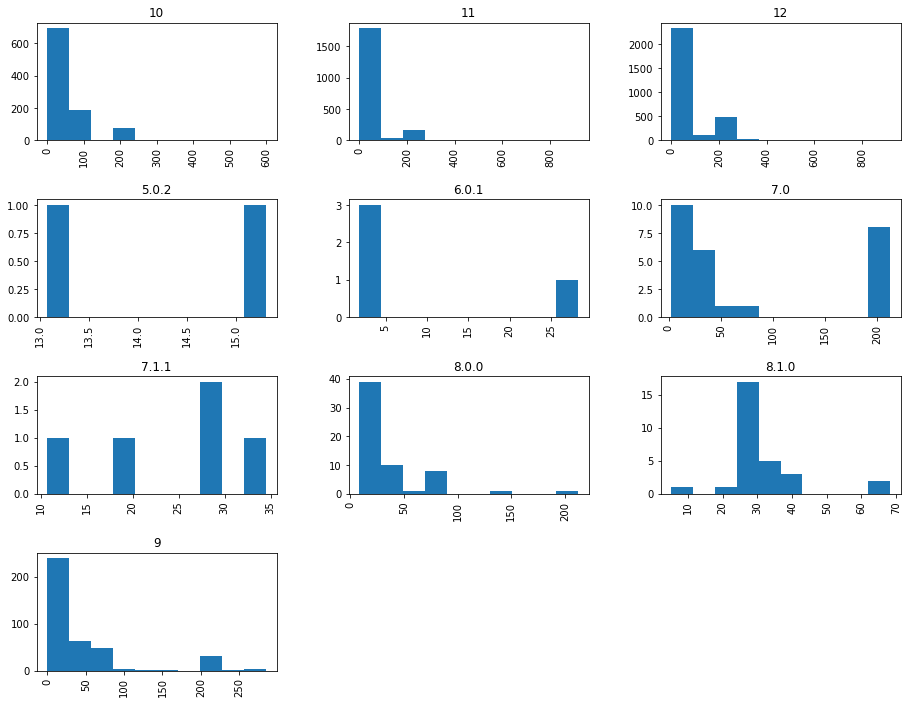

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

data7.hist(by="os_version")

In [101]:
data4.groupby("city").sum()


,eCPM (USD)
city,
Aberdeen,21.516378
Abilene,106.985760
Akron,1656.295847
Alameda,80.640000
Albany,162.580841
...,...
York,28.240000
Youngstown,81.439568
Ypsilanti,80.640000


In [100]:
data4.describe()

,eCPM (USD)
count,4362.000000
mean,65.321474
std,78.176758
min,1.149412
25%,28.025083
50%,31.265121
75%,80.640000
max,916.205811


3.

По диаграммам видно, что для всех видов реклам, наибольшее количество просмотров юзерами осуществляется os_version 12 
и наблюдается тенденция зависимости количества просмотров реклам и соответственно дохода от реклам от os_version:
с возрастанем os_version, растет количество просмотров и прибыли. Для форматов int и rv, наибольшее количество просмотров
приносит доход от 0-100 USD, для формата banner, наибольшее количество просмотров приносит доход от 0-5 USD, что и отражается 
на среднем eCPM (0.74 USD). Наибольший средний eCPM от рекламы принадлежит формату rv (48 USD), и соответственно просматривается реже 
чем два других формата. Наименьший средний eCPM принадлежит формату banner (0.74 USD), поэтому просматривается существенно
чаще чем остальные форматы. Максимальный eCPM по городам составляет порядка 1000 USD для форматов int и rv, тогда как максимальный eCPM
для формата banner не превышает и 50 USD. Наиболее стабильное распределение по городам наблюдается у формата banner, что отображается
на незначительном стандартном отклонении. Два остальных формата нестабильно распределены по городам несмотря на доходность.

4. Дополнительные (по желанию) 
– Какой процент доходов содержит информацию о городе юзера?

In [27]:
arr2=[] #массив данных столбца city 
for i in range(len(arr)):
    arr2.append(arr[i,15])
sum7=0
sum8=0
for i in range (len(d)):
    #общая сумма всех revenue
    sum7+=d[i]["revenue"]
for i in range (len(d)):
    #общая сумма всех revenue которые содержат информацию о городе юзера
    if str(arr2[i])!='nan':
        sum8+=d[i]["revenue"]

print (sum8/sum7*100,"% доходов содержит информацию о городе юзера")

63.57509823703389 % доходов содержит информацию о городе юзера
